## Public perception of plastic waste


In [1]:
#set everything up
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.options.display.max_colwidth = 400

In [2]:
#read in the data 
ConversationsLean=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/ConversationsLean.csv')
ConversationsLean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   447 non-null    int64  
 1   tweet.created_at             447 non-null    object 
 2   tweet.id                     447 non-null    float64
 3   tweet.full_text              447 non-null    object 
 4   tweet.entities               447 non-null    object 
 5   tweet.user.id                447 non-null    int64  
 6   tweet.user.screen_name       447 non-null    object 
 7   tweet.user.followers_count   447 non-null    int64  
 8   tweet.user.friends_count     447 non-null    int64  
 9   tweet.user.favourites_count  447 non-null    int64  
 10  tweet.user.statuses_count    447 non-null    int64  
 11  tweet.retweet_count          447 non-null    float64
 12  tweet.favorite_count         447 non-null    float64
 13  tweet.favorited     

In [3]:
ConversationsLean.sample(3)

Unnamed: 0            tweet.created_at      tweet.id  \
380          34  2019-05-22 18:30:18.000000  1.131266e+18   
400           6  2013-06-14 17:27:59.000000  3.455935e+17   
178         132  2016-12-02 18:05:50.000000  8.047484e+17   

                                                                                                                                                       tweet.full_text  \
380                2-foot-long plastic shower hose pulled from dead dolphin’s stomach. #plasticpollutes #plastickills\nhttps://t.co/oS9dAHsBH9 https://t.co/Fs0Z2QGnHo   
400                                               Pulp works pitching new plastic-free packaging @PulpWorksInc @PlasticPollutes @beyond_plastic http://t.co/SBGdOon3tL   
178  .@shawnwayans_ We love ur comedy but plastic straws &amp; lids r no joke, trust us. Learn more here: https://t.co/glQOqLxlZx #plasticfree https://t.co/hmaIxMS0gD   

                                                                                                                                                                                                                                                                                                                                                                                                      tweet.entities  \
380  {'hashtags': [{'text': 'plasticpollutes', 'indices': [68, 84]}, {'text': 'plastickills', 'indices': [85, 98]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/oS9dAHsBH9', 'expanded_url': 'http://ow.ly/h45R30oN880', 'display_url': 'ow.ly/h45R30oN880', 'indices': [99, 122]}], 'media': [{'id': 1131266047896690688, 'id_str': '1131266047896690688', 'indices': [123, 146], 'media...   
400  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'PulpWorksInc', 'name': 'PulpWorks Inc.', 'id': 334729920, 'id_str': '334729920', 'indices': [47, 60]}, {'screen_name': 'PlasticPollutes', 'name': 'Plastic Pollutes', 'id': 71310291, 'id_str': '71310291', 'indices': [61, 77]}, {'screen_name': 'Beyond_Plastic', 'name': 'Женя Плакса', 'id': 14642365, 'id_str': '14642365', 'indices...   
178  {'hashtags': [{'text': 'plasticfree', 'indices': [125, 137]}], 'symbols': [], 'user_mentions': [{'screen_name': 'shawnwayans_', 'name': 'Shawn Wayans', 'id': 1671145172, 'id_str': '1671145172', 'indices': [1, 14]}], 'urls': [{'url': 'https://t.co/glQOqLxlZx', 'expanded_url': 'http://www.5gyres.org/plastic-straws/', 'display_url': '5gyres.org/plastic-straws/', 'indices': [101, 124]}], 'media': ...   

     tweet.user.id tweet.user.screen_name  tweet.user.followers_count  \
380       71310291        PlasticPollutes                       45953   
400      327698038         DRussoInnovate                        1402   
178       85732762                 5gyres                       24165   

     tweet.user.friends_count  tweet.user.favourites_count  ...      love  \
380                      6595                        13453  ...  0.021325   
400                       523                          807  ...  0.111897   
178                      4021                         2025  ...  0.144501   

      sadness     trust  identity_hate    insult   obscene severe_toxic  \
380  0.327850  0.018189       0.004232  0.019602  0.015732     0.001875   
400  0.043541  0.070536       0.002034  0.003075  0.003046     0.001934   
178  0.081598  0.037854       0.002155  0.005364  0.005404     0.001411   

       threat     toxic  stakeholder  
380  0.001810  0.180749          NGO  
400  0.001940  0.006698       Artist  
178  0.001524  0.033308          NGO  

[3 rows x 31 columns]

In [4]:
ConversationsLean.groupby('stakeholder').count()

Unnamed: 0  tweet.created_at  tweet.id  tweet.full_text  \
stakeholder                                                                 
Artist                   104               104       104              104   
Multinational             20                20        20               20   
NGO                      241               241       241              241   
OtherInstitution          51                51        51               51   
Scientific                24                24        24               24   

                  tweet.entities  tweet.user.id  tweet.user.screen_name  \
stakeholder                                                               
Artist                       104            104                     104   
Multinational                 20             20                      20   
NGO                          241            241                     241   
OtherInstitution              51             51                      51   
Scientific                    24             24                      24   

                  tweet.user.followers_count  tweet.user.friends_count  \
stakeholder                                                              
Artist                                   104                       104   
Multinational                             20                        20   
NGO                                      241                       241   
OtherInstitution                          51                        51   
Scientific                                24                        24   

                  tweet.user.favourites_count  ...  joy  love  sadness  trust  \
stakeholder                                    ...                              
Artist                                    104  ...  104   104      104    104   
Multinational                              20  ...   20    20       20     20   
NGO                                       241  ...  241   241      241    241   
OtherInstitution                           51  ...   51    51       51     51   
Scientific                                 24  ...   24    24       24     24   

                  identity_hate  insult  obscene  severe_toxic  threat  toxic  
stakeholder                                                                    
Artist                      104     104      104           104     104    104  
Multinational                20      20       20            20      20     20  
NGO                         241     241      241           241     241    241  
OtherInstitution             51      51       51            51      51     51  
Scientific                   24      24       24            24      24     24  

[5 rows x 30 columns]

In [5]:
df = ConversationsLean.filter(regex='tweet')##select columns contain 'tweet'

In [6]:
tweettend=df.iloc[:,6:12]   

In [7]:
tweettend

tweet.user.followers_count  tweet.user.friends_count  \
0                         45953                      6595   
1                         45953                      6595   
2                         45953                      6595   
3                         45953                      6595   
4                         24165                      4022   
..                          ...                       ...   
442                       11810                      1592   
443                        1587                      1816   
444                      257497                       755   
445                      257497                       755   
446                      257497                       755   

     tweet.user.favourites_count  tweet.user.statuses_count  \
0                          13453                      18732   
1                          13453                      18732   
2                          13453                      18732   
3                          13453                      18732   
4                           2025                       6190   
..                           ...                        ...   
442                         1646                       3053   
443                        17795                       6788   
444                         8060                      14622   
445                         8060                      14622   
446                         8060                      14622   

     tweet.retweet_count  tweet.favorite_count  
0                   47.0                  66.0  
1                   15.0                  21.0  
2                   27.0                  35.0  
3                   45.0                  56.0  
4                    5.0                  10.0  
..                   ...                   ...  
442                 37.0                   0.0  
443                 28.0                   0.0  
444                 13.0                  70.0  
445                  5.0                  21.0  
446                 13.0                  29.0  

[447 rows x 6 columns]

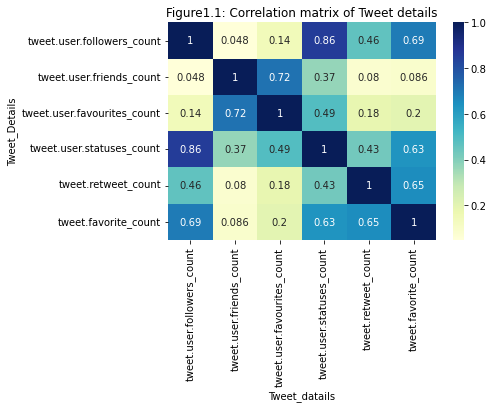

In [8]:
import matplotlib.pyplot as plt   ##use heat map find corrlation 
import seaborn as sb

tweettend_hm = sns.heatmap(tweettend.corr(),cmap="YlGnBu", annot = True)

tweettend_hm.set(xlabel='Tweet_datails', ylabel='Tweet_Details', title = "Figure1.1: Correlation matrix of Tweet details")

plt.show()

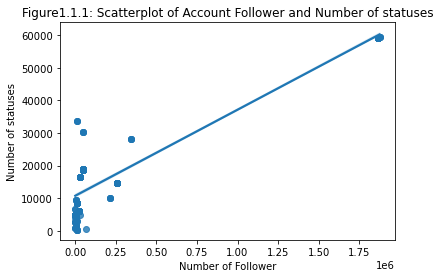

In [9]:
statnfollower = sns.regplot(x='tweet.user.followers_count', y='tweet.user.statuses_count', data=tweettend)
statnfollower.set_title('Figure1.1.1: Scatterplot of Account Follower and Number of statuses');
statnfollower.set_xlabel('Number of Follower');
statnfollower.set_ylabel('Number of statuses');

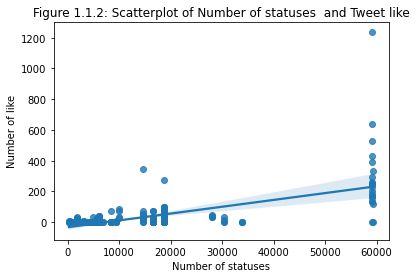

In [10]:
statnfollower = sns.regplot(x='tweet.user.statuses_count', y='tweet.favorite_count', data=tweettend)
statnfollower.set_title('Figure 1.1.2: Scatterplot of Number of statuses  and Tweet like');
statnfollower.set_xlabel('Number of statuses');
statnfollower.set_ylabel('Number of like');

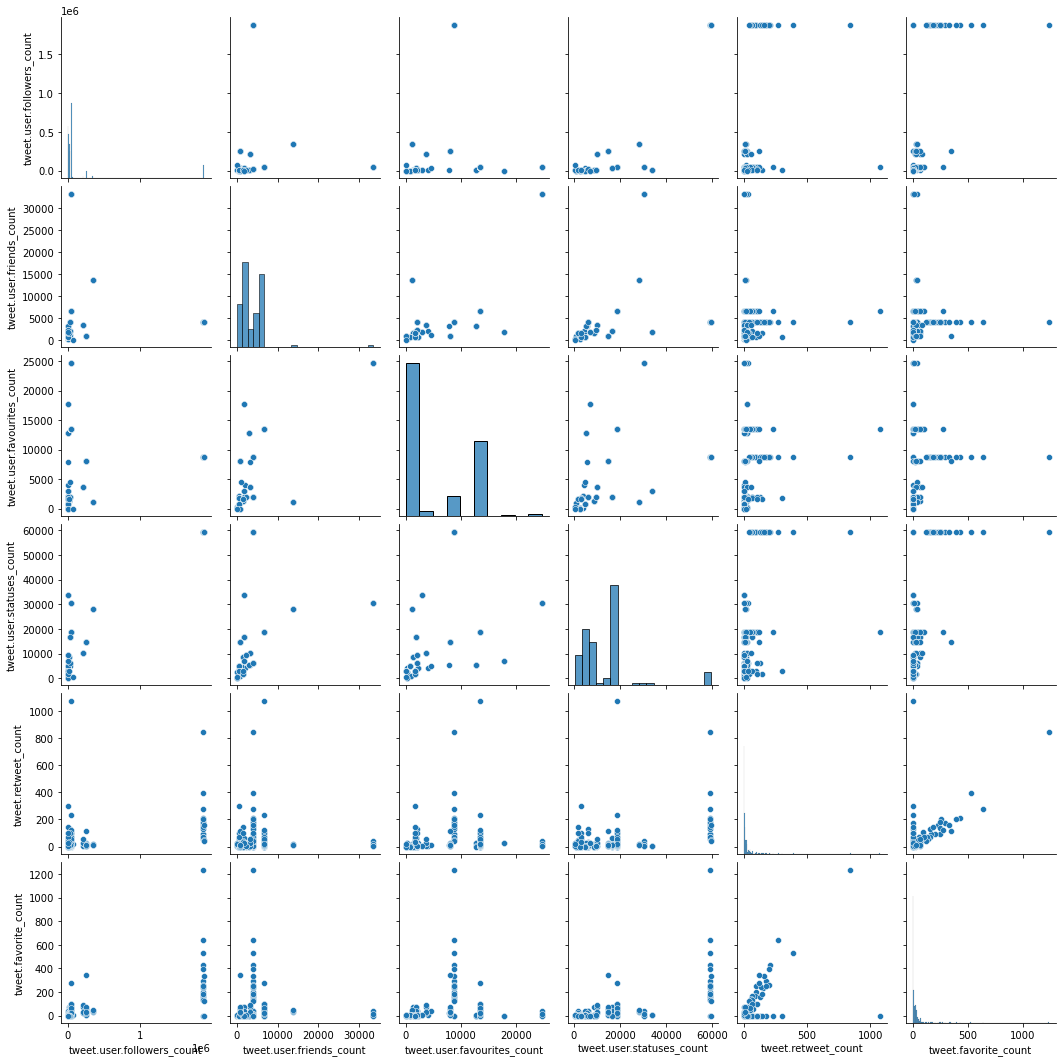

In [11]:
fig = sns.pairplot(tweettend)

In [12]:
df['tweet.created_time'] = pd.to_datetime(df['tweet.created_at'].str.split().str[-1])

/var/folders/kl/br53g2l90mlgzjhzqwspqhnm0000gn/T/ipykernel_36700/539827414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet.created_time'] = pd.to_datetime(df['tweet.created_at'].str.split().str[-1])


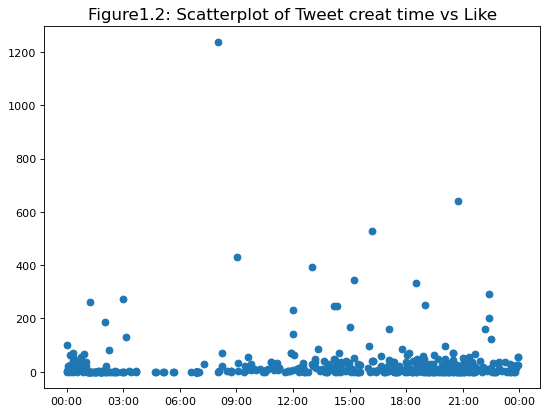

In [13]:
import matplotlib.dates as md

fig, tweettime_like = plt.subplots(figsize=(8,6), dpi= 80)
plt.scatter('tweet.created_time', 'tweet.favorite_count', data=df)
from matplotlib.dates import DateFormatter
hh_mm = DateFormatter('%H:%M')
tweettime_like.xaxis.set_major_formatter(hh_mm)
plt.title("Figure1.2: Scatterplot of Tweet creat time vs Like", fontsize=15)

plt.show()

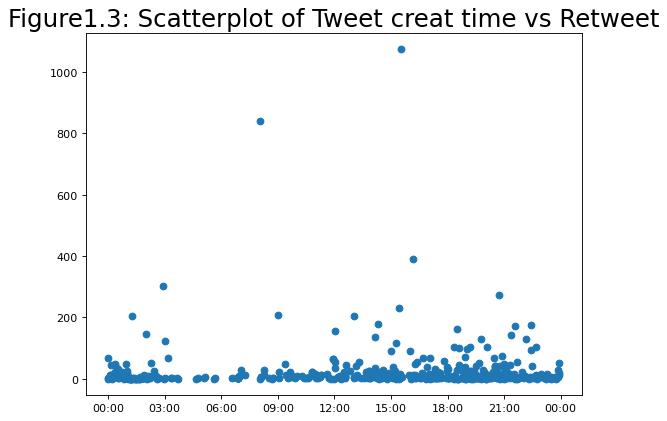

In [14]:
import matplotlib.dates as md

fig, tweettime_like = plt.subplots(figsize=(8,6), dpi= 80)
plt.scatter('tweet.created_time', 'tweet.retweet_count', data=df)
from matplotlib.dates import DateFormatter
hh_mm = DateFormatter('%H:%M')
tweettime_like.xaxis.set_major_formatter(hh_mm)
plt.title("Figure1.3: Scatterplot of Tweet creat time vs Retweet", fontsize=22)


plt.show()

In [15]:
df['creattime'] = pd.to_datetime(df['tweet.created_at'], format='%Y-%m-%d %H:%M:%S') ##convert to time  

/var/folders/kl/br53g2l90mlgzjhzqwspqhnm0000gn/T/ipykernel_36700/3427879370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['creattime'] = pd.to_datetime(df['tweet.created_at'], format='%Y-%m-%d %H:%M:%S') ##convert to time


In [16]:
df['day_of_week'] = df['creattime'].dt.dayofweek    ##add a new col for weekday
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

/var/folders/kl/br53g2l90mlgzjhzqwspqhnm0000gn/T/ipykernel_36700/2978127584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['creattime'].dt.dayofweek    ##add a new col for weekday
/var/folders/kl/br53g2l90mlgzjhzqwspqhnm0000gn/T/ipykernel_36700/2978127584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])


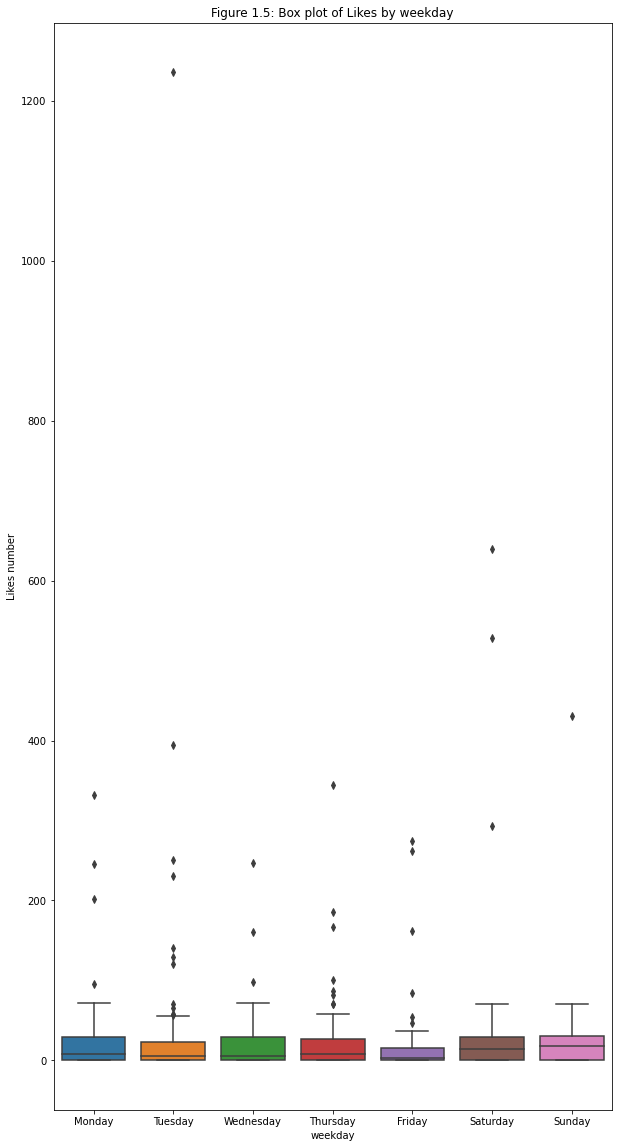

In [17]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,20
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

Weekday= sns.boxplot(x='day_of_week', y='tweet.favorite_count', data=df, order=order)
Weekday.set_title('Figure 1.5: Box plot of Likes by weekday');
Weekday.set_xlabel('weekday');
Weekday.set_ylabel('Likes number');

Summary: I extract the collum containing "Tweet" and create a  heatmap to see the correlations between dimensions (Figure 1.1). 

In account dimension:
I found that the number of followers has a high correlation with the number of statuses (including retweets). Accounts with more followers are more active and more post on Twitter.  
Active users are more likely to get more likes on the selected post.
Also, when an account has more friends, they "like" more tweets.
When an account has more followers, the tweets they post also get more likes.


In tweet dimension:
The more likes a tweet has, the more likely it will be retweeted.

I also create a column for the time of tweet crate and creat a ScatterPlot. From Figure 1.2 and 1.3, we found that there is no correlation between retweet/favourite with when the tweet was posted.

However, from Figure 1.4 & 1.5 , we can see that tweets posted on Weekend are more likely to get likes and retweets by others.


In [18]:
stakeholderimpact=ConversationsLean[['stakeholder','tweet.user.followers_count','tweet.retweet_count','tweet.favorite_count']]

In [19]:
stakeholderimpact

stakeholder  tweet.user.followers_count  tweet.retweet_count  \
0              NGO                       45953                 47.0   
1              NGO                       45953                 15.0   
2              NGO                       45953                 27.0   
3              NGO                       45953                 45.0   
4              NGO                       24165                  5.0   
..             ...                         ...                  ...   
442     Scientific                       11810                 37.0   
443     Scientific                        1587                 28.0   
444  Multinational                      257497                 13.0   
445  Multinational                      257497                  5.0   
446  Multinational                      257497                 13.0   

     tweet.favorite_count  
0                    66.0  
1                    21.0  
2                    35.0  
3                    56.0  
4                    10.0  
..                    ...  
442                   0.0  
443                   0.0  
444                  70.0  
445                  21.0  
446                  29.0  

[447 rows x 4 columns]

In [20]:
stakeholdermean=ConversationsLean.groupby(['stakeholder'])[['tweet.user.followers_count','tweet.retweet_count','tweet.favorite_count']].mean()
stakeholdermean

tweet.user.followers_count  tweet.retweet_count  \
stakeholder                                                         
Artist                           9121.240385             2.701923   
Multinational                  265708.200000            19.550000   
NGO                            202046.012448            38.680498   
OtherInstitution                29593.372549            10.039216   
Scientific                       4179.458333            28.333333   

                  tweet.favorite_count  
stakeholder                             
Artist                        1.403846  
Multinational                52.850000  
NGO                          46.456432  
OtherInstitution             12.411765  
Scientific                    1.250000

In [21]:
stakeholdermedian=ConversationsLean.groupby(['stakeholder'])[['tweet.user.followers_count','tweet.retweet_count','tweet.favorite_count']].median()
stakeholdermedian

tweet.user.followers_count  tweet.retweet_count  \
stakeholder                                                         
Artist                               11649.0                  2.0   
Multinational                       257497.0                 12.0   
NGO                                  45953.0                 12.0   
OtherInstitution                     31772.0                  6.0   
Scientific                            2865.0                  3.0   

                  tweet.favorite_count  
stakeholder                             
Artist                             0.0  
Multinational                     32.5  
NGO                               18.0  
OtherInstitution                   8.0  
Scientific                         0.0

In [22]:
stakeholderstd=ConversationsLean.groupby(['stakeholder'])[['tweet.user.followers_count','tweet.retweet_count','tweet.favorite_count']].std()
stakeholderstd

tweet.user.followers_count  tweet.retweet_count  \
stakeholder                                                         
Artist                           7938.313937             3.751711   
Multinational                   42256.170003            26.188537   
NGO                            529447.021049            99.021639   
OtherInstitution                 6673.858140            12.762383   
Scientific                       3250.514996            63.708348   

                  tweet.favorite_count  
stakeholder                             
Artist                        7.781630  
Multinational                71.945356  
NGO                         112.024510  
OtherInstitution             15.175212  
Scientific                    1.847442

In [23]:
userstakeholder=ConversationsLean[['tweet.user.screen_name','stakeholder']]
userstakeholder1= userstakeholder.drop_duplicates()
userstakeholder1

tweet.user.screen_name       stakeholder
0          PlasticPollutes               NGO
4                   5gyres               NGO
5                  WRAP_UK  OtherInstitution
25                Algalita        Scientific
31          DRussoInnovate            Artist
32         captainplanetfd               NGO
33         NoPlasticStraws               NGO
35           GordonJMillar            Artist
36             MaxLiboiron               NaN
37         driftersproject               NaN
38         EndPlasticWaste  OtherInstitution
42                  Nestle     Multinational
44                 PepsiCo     Multinational
105             Greenpeace               NGO
181        PlasticfreeBeth            Artist
247             HealTheBay               NGO
264              AnnaTurns            Artist
266                Maqueda            Artist
268            NonToxicRev               NGO
272          bahaplasmvmnt               NGO
299          AdvScientists        Scientific
300        EnvirHealthNews        Scientific
302        PlasticOceansUS        Scientific
304          janettewallis        Scientific
305         celinecousteau            Artist
306         FlotsamWeaving               NaN
342               Unilever     Multinational
425         SongsofJBrowne            Artist

In [24]:
userimpactre=ConversationsLean.groupby(['tweet.user.screen_name'])[['tweet.retweet_count']].mean()
userimpactre1=userimpactre.nlargest(n=10, columns=['tweet.retweet_count'])
userimpactre2=pd.merge(userimpactre1, userstakeholder1, on='tweet.user.screen_name')
userimpactre2

tweet.user.screen_name  tweet.retweet_count    stakeholder
0             Greenpeace           179.136364            NGO
1               Algalita            38.571429     Scientific
2        PlasticPollutes            33.401575            NGO
3               Unilever            27.750000  Multinational
4          janettewallis            26.500000     Scientific
5        NoPlasticStraws            22.650000            NGO
6          AdvScientists            21.500000     Scientific
7                 Nestle            19.000000  Multinational
8         SongsofJBrowne            17.000000         Artist
9             HealTheBay            16.500000            NGO

In [25]:
userimpactlike=ConversationsLean.groupby(['tweet.user.screen_name'])[['tweet.favorite_count']].mean()
userimpactlike1=userimpactlike.nlargest(n=10, columns=['tweet.favorite_count'])
userimpactlike2=pd.merge(userimpactlike1, userstakeholder1, on='tweet.user.screen_name')
userimpactlike2

tweet.user.screen_name  tweet.favorite_count       stakeholder
0             Greenpeace            288.954545               NGO
1                 Nestle             57.333333     Multinational
2               Unilever             53.750000     Multinational
3                PepsiCo             38.500000     Multinational
4         celinecousteau             36.000000            Artist
5        PlasticPollutes             31.708661               NGO
6         FlotsamWeaving             23.000000               NaN
7                WRAP_UK             13.586957  OtherInstitution
8             HealTheBay             12.500000               NGO
9                 5gyres             10.779661               NGO

In [26]:
userfollower=ConversationsLean[['tweet.user.screen_name','tweet.user.followers_count']]
userfollower1= userfollower.drop_duplicates()
userfollower1
userfollower2=userfollower1.nlargest(n=10, columns=['tweet.user.followers_count'])
userfollower3=pd.merge(userfollower2, userstakeholder1, on='tweet.user.screen_name')
userfollower3

tweet.user.screen_name  tweet.user.followers_count    stakeholder
0             Greenpeace                     1875552            NGO
1             Greenpeace                     1867284            NGO
2             Greenpeace                     1867275            NGO
3                PepsiCo                      341175  Multinational
4                 Nestle                      257497  Multinational
5               Unilever                      214875  Multinational
6         SongsofJBrowne                       69322         Artist
7             HealTheBay                       46981            NGO
8             HealTheBay                       46980            NGO
9        PlasticPollutes                       46168            NGO

summary: To evaluate the impact of an account or group, we can see the data of its followers, the number of likes the tweet got and how many times it got retweeted. 

From the tables above we can see that Multinational accounts average have more followers, also they tend to get more likes on tweets. Howbeit, NGO accounts' tweets spread more effective.  Besides the table of standard deviations, we can see that the standard deviation of NGOs is much higher than others, which also mean the performance of different NGO account is ragged.

Greenpeace is the most influential account in the dataset. They are the top one in the 3 metrics. Also, the only one that got over 1 million followers account. The average likes of tweets they got are over 5 times more than others. Also, the tweet spread is more.


summary:

I use 3 factors to define the user or group impact. 

1)   Number of followers: An account with a large amount of follower also mean that the number of Twitter users it reaches is larger. Also, the tweet will have more views, since Twitter will push the tweet to their follower.The number of followers is only a potential influence, and also involves issues of authenticity and interactivity. Authenticity: some of them may be fake accounts or ghost followers. Interactivity: It is pointless if the interactive rate is too low even if the account has a high number of followers.
2)   The average number of likes got: to see the interactive rate. Also, to see how many users agreed with the account.
3)   The average number of retweets: also, have us see how the account interacts with users. In addition, this can see the effectiveness of the account tweet spread. 

In [27]:
df['Popularity_score']= df['tweet.favorite_count']+df['tweet.retweet_count']

/var/folders/kl/br53g2l90mlgzjhzqwspqhnm0000gn/T/ipykernel_36700/2642492663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Popularity_score']= df['tweet.favorite_count']+df['tweet.retweet_count']


In [28]:
Top20tweet= df.nlargest(n=20, columns=['Popularity_score'])

In [29]:
Top20tweet

tweet.created_at      tweet.id  \
119  2019-09-03 08:01:26.000000  1.168796e+18   
102  2017-11-10 15:32:43.000000  9.290089e+17   
111  2019-11-09 16:10:04.000000  1.193199e+18   
115  2019-10-05 20:44:04.000000  1.180584e+18   
117  2019-09-08 09:00:26.000000  1.170623e+18   
122  2019-08-06 13:00:53.000000  1.158725e+18   
291  2020-01-06 18:30:07.000000  1.214253e+18   
107  2019-12-07 22:25:07.000000  1.203440e+18   
113  2019-10-25 01:15:03.000000  1.187538e+18   
336  2019-04-11 15:14:49.000000  1.116359e+18   
114  2019-10-23 14:20:00.000000  1.187011e+18   
432  2017-12-01 03:00:19.000000  9.364297e+17   
108  2019-11-26 12:01:09.000000  1.199297e+18   
109  2019-11-25 14:10:06.000000  1.198967e+18   
105  2019-12-24 19:01:06.000000  1.209550e+18   
123  2019-08-01 02:00:14.000000  1.156746e+18   
439  2016-05-13 02:54:51.000000  7.309544e+17   
106  2019-12-09 22:25:03.000000  1.204165e+18   
118  2019-09-04 22:10:03.000000  1.169372e+18   
112  2019-11-07 15:01:16.000000  1.192457e+18   

                                                                                                                                                                                                                                                                                     tweet.full_text  \
119                                                 Nestlé produced 1.7 million tonnes of plastic packaging last year, a 13% increase from the previous year.\n\nStop polluting our planet with single-use plastic &gt;&gt; https://t.co/xLZn6AR0Ai\n\n#BreakFreeFromPlastic https://t.co/torq3KFInf   
102                                                                                                                                                     RT @MarkRuffalo: By 2050 there may be more plastic in the ocean than fish. Let’s stop single use plastic #BreakFreeFromPlastic #BFFPT https…   
111                                                                                                                                                Over time, humans have discarded more than 6.3 billion metric tons of plastic.\n\nThat ends here. #BreakFreeFromPlastic \nhttps://t.co/zqadgzwxUY   
115                                                                                                                                                     We can’t recycle our way out of the plastic pollution crisis. We have to #BreakFreeFromPlastic!  (via @storyofstuff) https://t.co/2ZZ2710S6l   
117                                                                                                                                                                                                    Don’t just recycle — reduce and reuse first. \n#BreakFreeFromPlastic\nhttps://t.co/FwK35C4E9U   
122                                 We can't have companies publicly saying they want to end plastic pollution, while still financially supporting an association that lobbies for our continued reliance on throwaway plastics. \n\nWe just can't. \n#BreakFreeFromPlastic\nhttps://t.co/DWbfsugsaQ   
291                                                                                                                                             The plastic pollution we see in the ocean is just the tip of the iceberg\nLet’s make 2020 the year we #breakfreefromplastic\nhttps://t.co/TQ4s0dIhYG   
107                                            You’re doing more good than you might think when you use reusables instead of throwaway plastic packaging. Join the #ReuseRevolution and push companies around the world to #BreakFreeFromPlastic!\n\nhttps://t.co/Onj591Imdd https://t.co/Irie87aKHa   
113  "Coca-Cola’s dubious distinction of being the top global contributor of plastic waste for two consecutive years runs counter to the company’s carefully curated public image as an environmental leader." \n\n#BreakFreeFromPlastic &gt;&gt; https://t.co/GEa1Iq0hNg\n\nhttps://t.co/bYiygD4VNb   
336                      

In [30]:
import re

In [31]:
tweets = Top20tweet['tweet.full_text']

In [32]:
tweets_df = pd.DataFrame({'Tweets': tweets})

In [33]:
tweets_df['hashtags'] = tweets_df['Tweets'].apply(lambda twt : re.findall(r"#(\w+)", twt))

In [34]:
tweets_df['Created by']=Top20tweet['tweet.user.screen_name']

In [35]:
tweets_df

Tweets  \
119                                                 Nestlé produced 1.7 million tonnes of plastic packaging last year, a 13% increase from the previous year.\n\nStop polluting our planet with single-use plastic &gt;&gt; https://t.co/xLZn6AR0Ai\n\n#BreakFreeFromPlastic https://t.co/torq3KFInf   
102                                                                                                                                                     RT @MarkRuffalo: By 2050 there may be more plastic in the ocean than fish. Let’s stop single use plastic #BreakFreeFromPlastic #BFFPT https…   
111                                                                                                                                                Over time, humans have discarded more than 6.3 billion metric tons of plastic.\n\nThat ends here. #BreakFreeFromPlastic \nhttps://t.co/zqadgzwxUY   
115                                                                                                                                                     We can’t recycle our way out of the plastic pollution crisis. We have to #BreakFreeFromPlastic!  (via @storyofstuff) https://t.co/2ZZ2710S6l   
117                                                                                                                                                                                                    Don’t just recycle — reduce and reuse first. \n#BreakFreeFromPlastic\nhttps://t.co/FwK35C4E9U   
122                                 We can't have companies publicly saying they want to end plastic pollution, while still financially supporting an association that lobbies for our continued reliance on throwaway plastics. \n\nWe just can't. \n#BreakFreeFromPlastic\nhttps://t.co/DWbfsugsaQ   
291                                                                                                                                             The plastic pollution we see in the ocean is just the tip of the iceberg\nLet’s make 2020 the year we #breakfreefromplastic\nhttps://t.co/TQ4s0dIhYG   
107                                            You’re doing more good than you might think when you use reusables instead of throwaway plastic packaging. Join the #ReuseRevolution and push companies around the world to #BreakFreeFromPlastic!\n\nhttps://t.co/Onj591Imdd https://t.co/Irie87aKHa   
113  "Coca-Cola’s dubious distinction of being the top global contributor of plastic waste for two consecutive years runs counter to the company’s carefully curated public image as an environmental leader." \n\n#BreakFreeFromPlastic &gt;&gt; https://t.co/GEa1Iq0hNg\n\nhttps://t.co/bYiygD4VNb   
336                           Tackling plastic pollution is an urgent priority for us. We are looking at every option to help address the plastic waste problem. Find out more https://t.co/AHUNt1csHu #BeatPlasticPollution #sustainability #Nestle #circulareconomy #SDG12 https://t.co/UaoDux5uYf   
114      BREAKING: @CocaCola, @Nestle, @PepsiCo, @MDLZ and @Unilever are the top 5 corporate plastic polluters of 2019. It's time for them to be held accountable.\n\nRead the full @brkfreeplastic #BrandAudit2019 report: https://t.co/7ZWDWuo8iH\n\n#BreakFreeFromPlastic https://t.co/CXaTp53YcR   
432                                                                                                                                                            #DidYouKnow Americans alone discard 30+ mil tons of plastic a year, only 8% is recycled. #RefuseSingleUse plastic whenever possible 🌎   
108  Tiny bits of plastic were found in nine major rivers in Europe, in 100% of tests. \n\nMicroplastics often absorb pollutants and become highly toxic. \n\nPretty gross.\n\nThese plastics have been found in our food, and drinking water. 🤢\n\n#BreakFreeFromPlastic\n\nhttps://t.co/5Af0DqVOHo   
109         Tiny bits of plastic were found in nine major rivers in Europe, in 100% of tests. \n\nMicroplastics often absorb pollutants and be

In [36]:
tweets_df.Tweets.str.extractall(r'(\#\w+)')[0].value_counts()

#BreakFreeFromPlastic    16
#ReuseRevolution          2
#DidYouKnow               2
#BFFPT                    1
#breakfreefromplastic     1
#BeatPlasticPollution     1
#sustainability           1
#Nestle                   1
#circulareconomy          1
#SDG12                    1
#BrandAudit2019           1
#RefuseSingleUse          1
#Resolve2Refuse           1
Name: 0, dtype: int64

summary: I created a value called "Popularity_score" to evaluate the tweet impact. "Popularity_score" is combined with the number of likes and retweets. 
Then I find out the Top 20 tweets by the Popularity Score. From the Top 20 Tweets, I can extract the hashtags mentioned.  Then count the frequency of tag occurrences from it.
We find that the most frequency used tag is #BreakFreeFromPlastic, which appear 16 time in top 20 tweets, and the mian contrbuitor is Greenpeace. 

In [37]:
emotionsdf=ConversationsLean.iloc[:,18:30] 
emotionsdf

anger      fear       joy      love   sadness     trust  \
0    0.455982  0.131354  0.068569  0.018031  0.322537  0.027230   
1    0.544908  0.445253  0.038638  0.014274  0.514795  0.026532   
2    0.544908  0.445253  0.038638  0.014274  0.514795  0.026532   
3    0.285808  0.310826  0.061857  0.011482  0.424019  0.027274   
4    0.215035  0.111665  0.403973  0.048335  0.167924  0.028655   
..        ...       ...       ...       ...       ...       ...   
442  0.125110  0.205192  0.307869  0.021639  0.199803  0.032205   
443  0.432412  0.198018  0.098556  0.018792  0.570367  0.033786   
444  0.180171  0.222961  0.377572  0.080467  0.271046  0.051404   
445  0.439692  0.342651  0.071170  0.012816  0.366335  0.024354   
446  0.131805  0.049316  0.726587  0.075690  0.053219  0.062603   

     identity_hate    insult   obscene  severe_toxic    threat     toxic  
0         0.002061  0.002930  0.002914      0.002038  0.001993  0.006145  
1         0.002229  0.002969  0.002686      0.001999  0.002120  0.005442  
2         0.002229  0.002969  0.002686      0.001999  0.002120  0.005442  
3         0.002071  0.003528  0.003506      0.001662  0.001748  0.011816  
4         0.002453  0.002630  0.002603      0.002396  0.002266  0.003701  
..             ...       ...       ...           ...       ...       ...  
442       0.002583  0.002553  0.002628      0.002520  0.002351  0.003702  
443       0.002264  0.004385  0.004218      0.001900  0.002034  0.021807  
444       0.002474  0.002590  0.002657      0.002344  0.002292  0.003951  
445       0.002263  0.002868  0.002943      0.002096  0.002007  0.006479  
446       0.002559  0.002641  0.002556      0.002399  0.002261  0.003506  

[447 rows x 12 columns]

In [38]:
emotionssum=emotionsdf.sum(axis = 0, skipna = True)
emotionssum=pd.DataFrame(emotionssum)
emotionssum=emotionssum.reset_index()
emotionssum.columns=['emotion','value']
emotionssum

emotion       value
0           anger  127.685109
1            fear   90.959085
2             joy  167.463679
3            love   36.133000
4         sadness  104.169380
5           trust   22.924750
6   identity_hate    1.196376
7          insult    2.962005
8         obscene    2.424903
9    severe_toxic    0.913498
10         threat    0.930298
11          toxic   12.543198

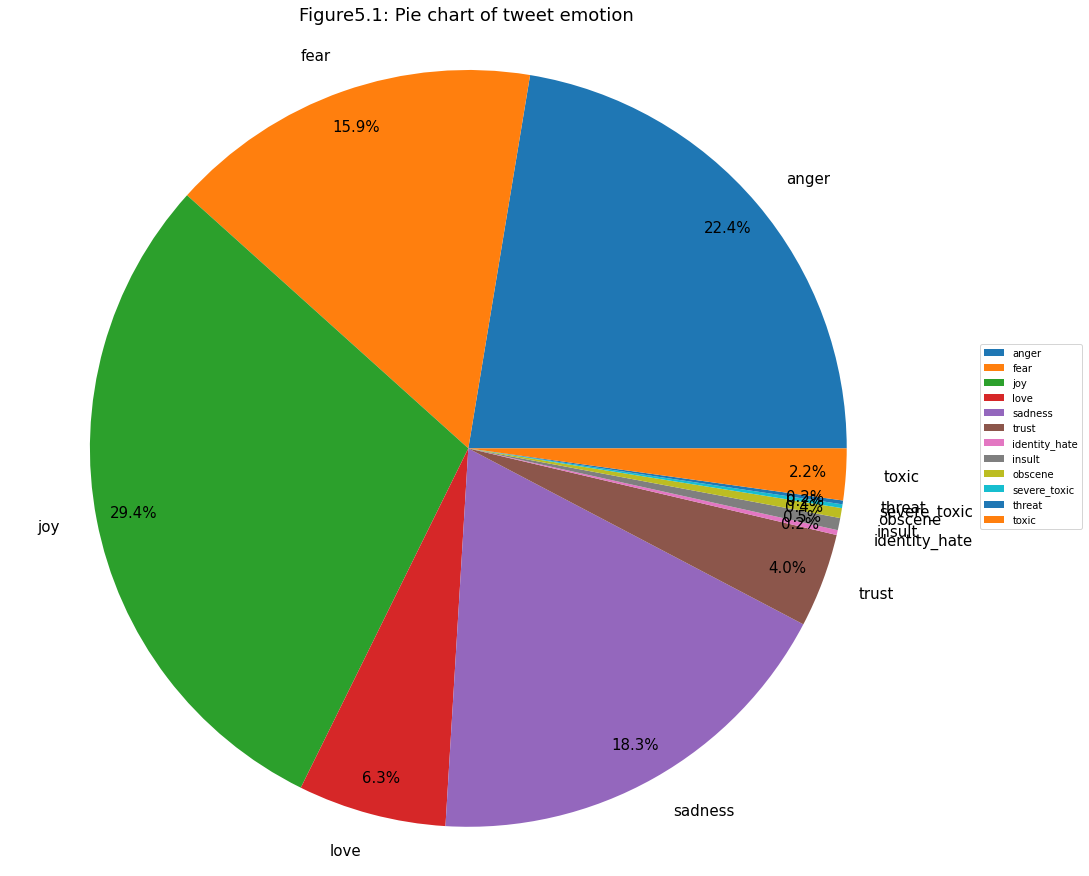

In [39]:
fig, ax1 = plt.subplots(figsize =(15, 15))
labels=emotionssum['emotion']
size=emotionssum['value']
emoionpie = ax1.pie(size,labels=labels,autopct = "%1.1f%%",pctdistance = 0.9,
                    textprops = {"fontsize" : 15})
plt.axis('equal')
plt.title("Figure5.1: Pie chart of tweet emotion", {"fontsize" : 18})
plt.legend(emoionpie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)


In [40]:
emotionssum['type']= ['negative','negative','positive','positive','negative','positive','negative','negative','negative','negative','negative','negative']
emotionssum

emotion       value      type
0           anger  127.685109  negative
1            fear   90.959085  negative
2             joy  167.463679  positive
3            love   36.133000  positive
4         sadness  104.169380  negative
5           trust   22.924750  positive
6   identity_hate    1.196376  negative
7          insult    2.962005  negative
8         obscene    2.424903  negative
9    severe_toxic    0.913498  negative
10         threat    0.930298  negative
11          toxic   12.543198  negative

In [41]:
negative_sum = emotionssum[emotionssum['type']=='negative']['value'].sum()
positive_sum = emotionssum[emotionssum['type']=='positive']['value'].sum()

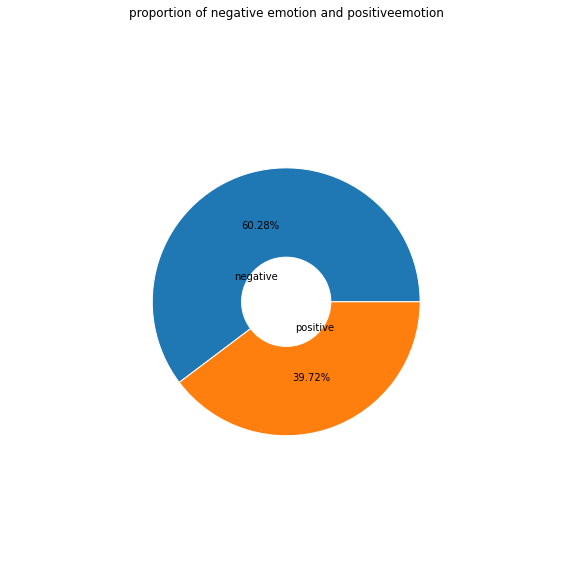

In [42]:
fig, ax2 = plt.subplots()
size = 0.4
ax2.pie([negative_sum, positive_sum], labels=['negative','positive'], labeldistance=0.2,
       autopct='%1.2f%%', pctdistance=0.6,
       radius=1-size, wedgeprops=dict(width=size, edgecolor='w'))
plt.title('proportion of negative emotion and positiveemotion')
plt.show()

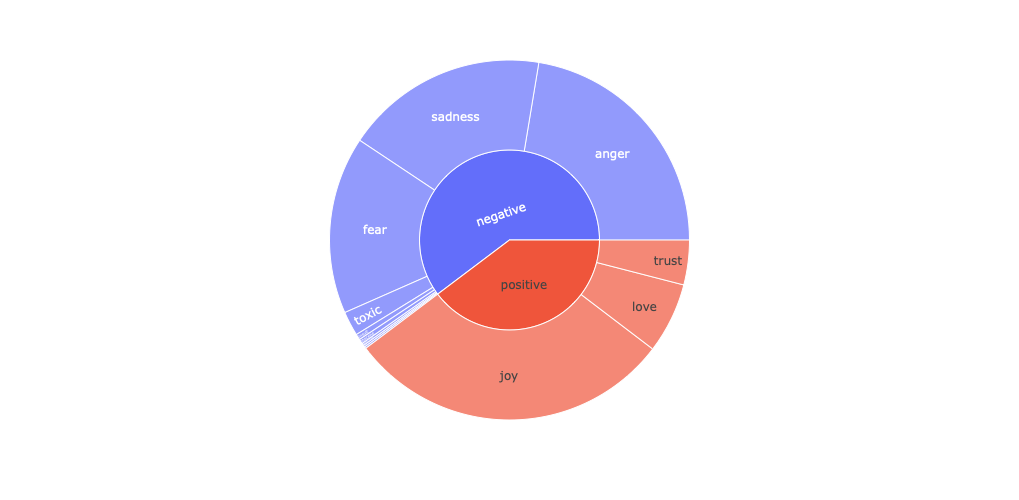

In [43]:
import plotly.express as px
fig = px.sunburst(emotionssum, path=['type', 'emotion'], values='value', color='type',color_continuous_scale='ylgnbu',width=500,height=500)
fig.show()

summary: I create another table called emotionsdf which contains the data related to tweet emotion. Then I calculate the sum of each type of them. I also defined each emotion as negative and positive. 

From Figure 5.1, we can see that tweets contain with joy emotions have nearly 30%. Second is anger have 22.4% then sadness has 18.3%. Even though joy has the biggest proportion, the negative emotion still is the majority.  12 emotions were mentioned only 3 of them are positive. Tweets in the dataset contain over 60% negative emotion and only  39% is positive.

In [44]:
emotionsdf['tweet.retweet_count']=ConversationsLean['tweet.retweet_count'] 
emotionsdf['tweet.favorite_count']=ConversationsLean['tweet.favorite_count'] 
emotionsdf['Popularity_score']= df['Popularity_score']
emotionsdf

anger      fear       joy      love   sadness     trust  \
0    0.455982  0.131354  0.068569  0.018031  0.322537  0.027230   
1    0.544908  0.445253  0.038638  0.014274  0.514795  0.026532   
2    0.544908  0.445253  0.038638  0.014274  0.514795  0.026532   
3    0.285808  0.310826  0.061857  0.011482  0.424019  0.027274   
4    0.215035  0.111665  0.403973  0.048335  0.167924  0.028655   
..        ...       ...       ...       ...       ...       ...   
442  0.125110  0.205192  0.307869  0.021639  0.199803  0.032205   
443  0.432412  0.198018  0.098556  0.018792  0.570367  0.033786   
444  0.180171  0.222961  0.377572  0.080467  0.271046  0.051404   
445  0.439692  0.342651  0.071170  0.012816  0.366335  0.024354   
446  0.131805  0.049316  0.726587  0.075690  0.053219  0.062603   

     identity_hate    insult   obscene  severe_toxic    threat     toxic  \
0         0.002061  0.002930  0.002914      0.002038  0.001993  0.006145   
1         0.002229  0.002969  0.002686      0.001999  0.002120  0.005442   
2         0.002229  0.002969  0.002686      0.001999  0.002120  0.005442   
3         0.002071  0.003528  0.003506      0.001662  0.001748  0.011816   
4         0.002453  0.002630  0.002603      0.002396  0.002266  0.003701   
..             ...       ...       ...           ...       ...       ...   
442       0.002583  0.002553  0.002628      0.002520  0.002351  0.003702   
443       0.002264  0.004385  0.004218      0.001900  0.002034  0.021807   
444       0.002474  0.002590  0.002657      0.002344  0.002292  0.003951   
445       0.002263  0.002868  0.002943      0.002096  0.002007  0.006479   
446       0.002559  0.002641  0.002556      0.002399  0.002261  0.003506   

     tweet.retweet_count  tweet.favorite_count  Popularity_score  
0                   47.0                  66.0             113.0  
1                   15.0                  21.0              36.0  
2                   27.0                  35.0              62.0  
3                   45.0                  56.0             101.0  
4                    5.0                  10.0              15.0  
..                   ...                   ...               ...  
442                 37.0                   0.0              37.0  
443                 28.0                   0.0              28.0  
444                 13.0                  70.0              83.0  
445                  5.0                  21.0              26.0  
446                 13.0                  29.0              42.0  

[447 rows x 15 columns]

In [45]:
Top10tweet= emotionsdf.nlargest(n=10, columns=['Popularity_score']) 
Top10tweet

anger      fear       joy      love   sadness     trust  \
119  0.388806  0.121779  0.301679  0.026771  0.146202  0.030986   
102  0.369517  0.402792  0.080048  0.013548  0.414574  0.024883   
111  0.305728  0.252766  0.151944  0.020060  0.483020  0.019672   
115  0.386945  0.384878  0.073301  0.018445  0.470035  0.026788   
117  0.247750  0.106376  0.307120  0.041767  0.134229  0.057651   
122  0.748713  0.218193  0.050284  0.019756  0.345885  0.030748   
291  0.348750  0.304874  0.129772  0.012167  0.406102  0.020726   
107  0.102110  0.029078  0.842897  0.152183  0.058288  0.103991   
113  0.730127  0.279738  0.107567  0.030598  0.261710  0.051953   
336  0.279577  0.414529  0.164753  0.037610  0.343872  0.046604   

     identity_hate    insult   obscene  severe_toxic    threat     toxic  \
119       0.002175  0.003384  0.002867      0.001968  0.001905  0.009529   
102       0.002168  0.003707  0.003694      0.001557  0.001868  0.016588   
111       0.002046  0.002895  0.002889      0.002010  0.001876  0.007789   
115       0.002317  0.006987  0.005484      0.001433  0.001658  0.045963   
117       0.002235  0.003096  0.002911      0.001845  0.002027  0.006939   
122       0.002113  0.005630  0.004585      0.001392  0.001603  0.031574   
291       0.002107  0.004612  0.004363      0.001441  0.001623  0.025038   
107       0.002088  0.003743  0.003278      0.001584  0.001802  0.012441   
113       0.002268  0.002642  0.002790      0.002253  0.002210  0.004407   
336       0.002352  0.002786  0.002906      0.002401  0.002362  0.004468   

     tweet.retweet_count  tweet.favorite_count  Popularity_score  
119                840.0                1236.0            2076.0  
102               1074.0                   0.0            1074.0  
111                392.0                 528.0             920.0  
115                274.0                 639.0             913.0  
117                209.0                 431.0             640.0  
122                204.0                 394.0             598.0  
291                161.0                 332.0             493.0  
107                175.0                 293.0             468.0  
113                203.0                 262.0             465.0  
336                118.0                 345.0             463.0

In [46]:
Top10tweetemo=Top10tweet.iloc[:,:12] 

In [47]:
Top10tweetsum=Top10tweetemo.sum(axis = 0, skipna = True)
Top10tweetsum=pd.DataFrame(Top10tweetsum)
Top10tweetsum=Top10tweetsum.reset_index()
Top10tweetsum.columns=['emotion','value']
Top10tweetsum['type']= ['negative','negative','positive','positive','negative','positive','negative','negative','negative','negative','negative','negative']
Top10tweetsum.sort_values(by='value', ascending=False)

emotion     value      type
0           anger  3.908023  negative
4         sadness  3.063917  negative
1            fear  2.515006  negative
2             joy  2.209366  positive
5           trust  0.414002  positive
3            love  0.372905  positive
11          toxic  0.164736  negative
7          insult  0.039482  negative
8         obscene  0.035768  negative
6   identity_hate  0.021869  negative
10         threat  0.018934  negative
9    severe_toxic  0.017884  negative

In [48]:
negative_sum1 = Top10tweetsum[Top10tweetsum['type']=='negative']['value'].sum()
positive_sum1 = Top10tweetsum[Top10tweetsum['type']=='positive']['value'].sum()

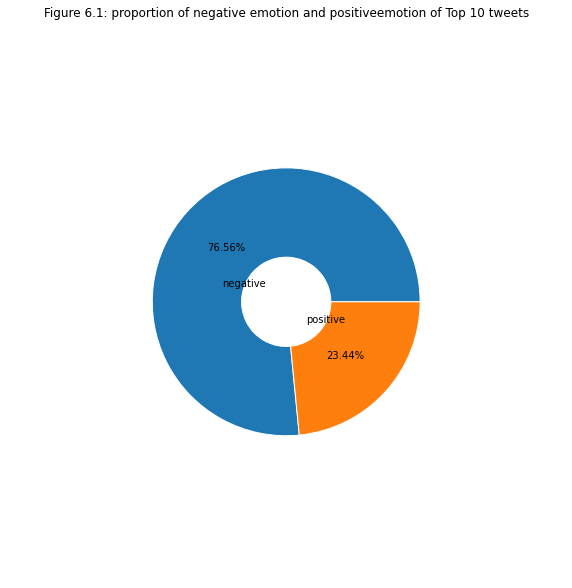

In [49]:
fig, ax3 = plt.subplots()
size = 0.4
ax3.pie([negative_sum1, positive_sum1], labels=['negative','positive'], labeldistance=0.2,
       autopct='%1.2f%%', pctdistance=0.6,
       radius=1-size, wedgeprops=dict(width=size, edgecolor='w'))
plt.title('Figure 6.1: proportion of negative emotion and positiveemotion of Top 10 tweets')
plt.show()

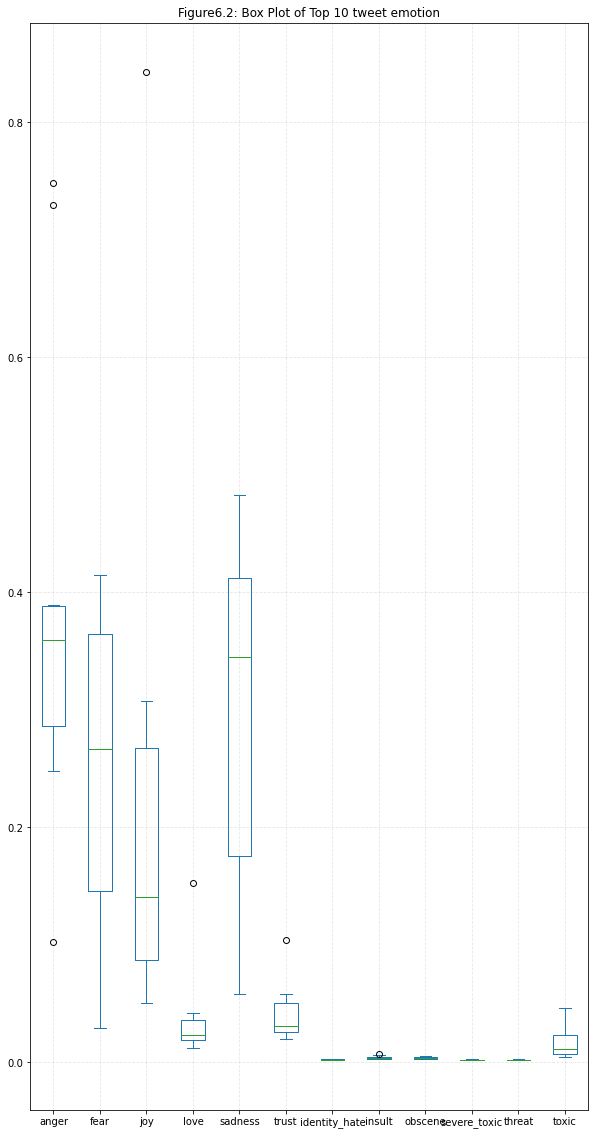

In [50]:
Top10tweetemo.plot.box(title="Figure6.2: Box Plot of Top 10 tweet emotion")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

summary: If we do not consider the user's own influence, we can still use the Popularity score to define the influence of tweets.  I all the Popularity score to the data frame and sort the top 10 tweets out.  I sum all the emotion scores and also use a pie chart and boxplot to give us a more clear picture. 

From the table, we can see that from the top 10 tweets, anger has the highest score. Follow by sadness and fear. Also, Figure 6.1 disclose that in the top 10 influence tweets. over 76% contain negative emotion, Positive emotion not enough for a quarter.  Figure 6.2 that the median and the minimum of anger are the highest which also means that anger is the most feeling contained in the tweets. This explains that negative emotion tweets have a higher influence, especially, anger, sadness and fear. 

In [51]:
ConversationsLean['txt']=ConversationsLean['tweet.full_text'].str.lower()

In [52]:
ConversationsLean['Company_name_mentioned'] = ConversationsLean['txt'].str.extract(r'@([\w]+)')

In [53]:
Company_name=ConversationsLean['Company_name_mentioned']

In [54]:
from collections import Counter

d2 = Counter(Company_name)
sorted_x = sorted(d2.items(), key=lambda x: x[1], reverse=True)
sorted_x

[(nan, 193),
 ('plasticpollutes', 17),
 ('circulareconomy', 16),
 ('brkfreeplastic', 14),
 ('beyond_plastic', 9),
 ('cocacola', 8),
 ('amazon', 6),
 ('ecoetsy', 6),
 ('ciel_tweets', 5),
 ('implicitweet', 4),
 ('plasticfreebeth', 4),
 ('nespresso', 3),
 ('natgeo', 3),
 ('nestle', 3),
 ('lifewoutplastic', 3),
 ('bewastewise', 3),
 ('kumulab', 3),
 ('recycle_now', 2),
 ('pepsi', 2),
 ('gcnewsl', 2),
 ('ecowatch', 2),
 ('gaianoburn', 2),
 ('danone', 2),
 ('storyofstuff', 2),
 ('starbucks', 2),
 ('mmitaly', 2),
 ('momsrising', 2),
 ('debralynndadd', 2),
 ('jackjohnson', 2),
 ('veolia', 2),
 ('circulatecap', 2),
 ('twa2jenny', 2),
 ('bandaid_social', 2),
 ('r_swannell', 1),
 ('industryeurope', 1),
 ('kirkman_richard', 1),
 ('peterjmaddox', 1),
 ('axios', 1),
 ('plasticbank', 1),
 ('newgrass', 1),
 ('elspethmurray', 1),
 ('cwhumanecology', 1),
 ('tomrarecycling', 1),
 ('henkel', 1),
 ('covestrous', 1),
 ('downewsroom', 1),
 ('anitafromaus', 1),
 ('greenpeace', 1),
 ('boell_stiftung', 1),
 ('e

Summary:  Since the font case may affect the outcome, I convert it all to lower case. Then I create a new column to contain words after @, because most of the company names can be found after @. Then use the function to count the time mentioned.

According to the outcome: Coca-cola was mentioned the most, followed by is amazon.

In [55]:
ConversationsLean['Findall_Company_name'] = ConversationsLean['txt'].str.findall(r'@([\w]+)')

In [56]:
def drop_duplicates(items):
    result = []
    seen = set()
    for item in items:
        item = item.strip()
        if item not in seen:
            seen.update([item])
            result.append(item)
    return ','.join(result)

In [57]:
ConversationsLean['Findall_Company_name'].apply(drop_duplicates)

0                     
1                     
2                     
3                     
4                     
            ...       
442               unep
443    plasticpollutes
444                   
445      ggginitiative
446             danone
Name: Findall_Company_name, Length: 447, dtype: object

In [58]:
ConversationsLean['Cocacola']=ConversationsLean['Findall_Company_name'].str.contains("cocacola",regex = False)

In [59]:
Cocacolaemo=ConversationsLean.groupby(['Cocacola']).mean()
Cocacolaemodf=Cocacolaemo.iloc[:,11:23] 
Cocacolaemodf

anger      fear       joy      love   sadness     trust  \
Cocacola                                                               
False     0.277699  0.202072  0.381018  0.082245  0.231378  0.051612   
True      0.633084  0.265359  0.095895  0.019190  0.305702  0.037011   

          identity_hate    insult   obscene  severe_toxic    threat     toxic  
Cocacola                                                                       
False          0.002672  0.006490  0.005325      0.002051  0.002084  0.027092  
True           0.002888  0.012594  0.009770      0.001739  0.001945  0.070418

In [60]:
Cocacolaemodft=Cocacolaemodf.T
Cocacolaemodf.T

Cocacola          False      True
anger          0.277699  0.633084
fear           0.202072  0.265359
joy            0.381018  0.095895
love           0.082245  0.019190
sadness        0.231378  0.305702
trust          0.051612  0.037011
identity_hate  0.002672  0.002888
insult         0.006490  0.012594
obscene        0.005325  0.009770
severe_toxic   0.002051  0.001739
threat         0.002084  0.001945
toxic          0.027092  0.070418

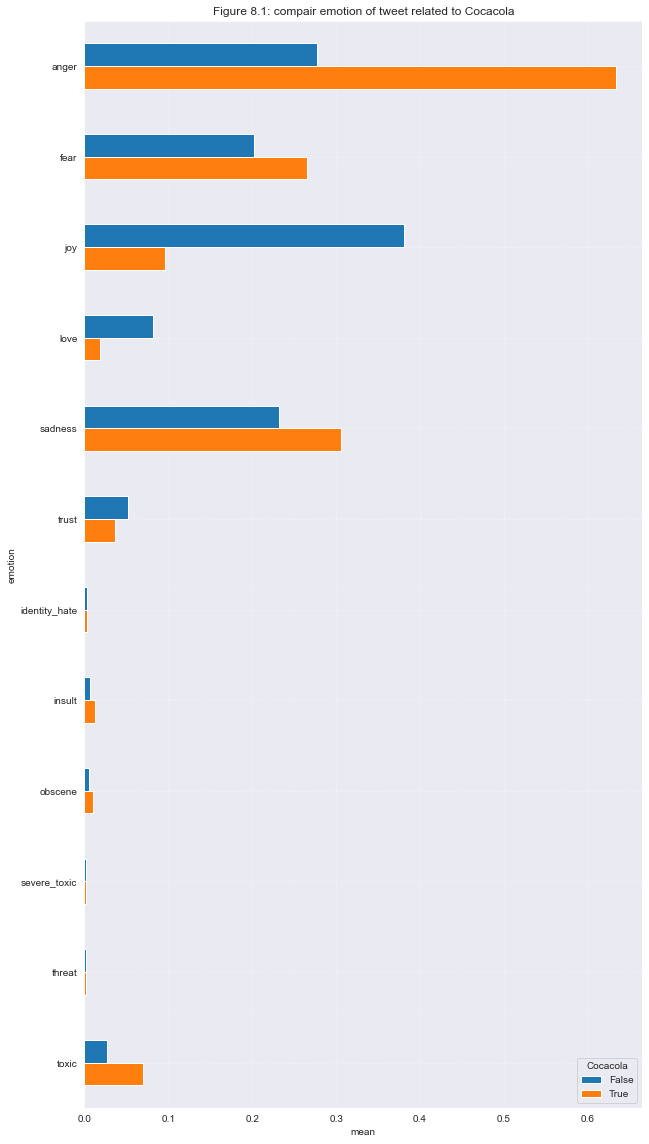

In [61]:
sns.set_style("dark")
Cocacolaemodplot=Cocacolaemodft.plot(kind="barh",title="Figure 8.1: compair emotion of tweet related to Cocacola")
Cocacolaemodplot.invert_yaxis()
plt.grid(linestyle="--", alpha=0.3)
plt.xlabel("mean")
plt.ylabel("emotion")
plt.show()

summary: Because Coca-cola is the most mentioned company,    using Coca-cola data can make sure the emotion score can more represent public emotion, therefore I would like to have a further study of it. Since we need to focus on the emotional score related to Coca-cola, I extract the score and also create a new column to define rather Cocacola is mentioned or not. 2 groups are formed: True, False. Then calculate the mean of the 2 groups and use a plot to visualize it.

From Figure 8.1, we can see that the mean anger score with Coca-cola mentioned is double of the other tweets. Also, the score of negative emotions such as fear, sadness toxic, etc for Coca-cola related is higher then other tweets. . The positive emotion like joy, love, and trust, on the contrary, have a lower score than the tweet in general.

In [62]:
Companies=['starbucks','veolia','virgin','nestle','nespresso','salonsolids','amazon','pepsi','treadrightorg',
              'cocacola','cifargentina','ioniqacircular','simplygum','danone']

In [63]:
ConversationsLean['oncompanylist']=ConversationsLean['Findall_Company_name'].astype(str).str.findall(f'{"|".join(Companies)}').str.join(',').replace('',np.nan)

In [64]:
Allcompaniesemo=ConversationsLean.groupby(['oncompanylist']).sum()
Allcompaniesemo=Allcompaniesemo.iloc[:,11:23] 
Allcompaniesemo.loc['amazon'] += Allcompaniesemo.loc['amazon,amazon']
Allcompaniesemo.drop(['amazon,amazon'], inplace=True)
Allcompaniesemo.loc['cocacola,nestle,pepsi'] += Allcompaniesemo.loc['cocacola,pepsi,nestle']
Allcompaniesemo.drop(['cocacola,pepsi,nestle'], inplace=True)
Allcompaniesemo

anger      fear       joy      love   sadness  \
oncompanylist                                                             
amazon                 4.018064  0.966272  0.851094  0.224360  1.560050   
cifargentina           0.109244  0.052170  0.752954  0.150844  0.052447   
cocacola               1.690710  0.840075  0.265514  0.047718  0.983033   
cocacola,nestle,pepsi  4.640128  1.813519  0.693434  0.144184  2.073983   
danone                 0.391632  0.201747  0.982919  0.097968  0.233953   
ioniqacircular         0.095885  0.115382  0.502101  0.066952  0.090299   
nespresso              0.200470  0.148464  2.393831  0.544778  0.219071   
nestle                 1.446969  0.639166  0.859938  0.179862  0.697664   
pepsi                  0.858276  0.219774  0.055140  0.029058  0.267622   
pepsi,starbucks        0.091057  0.049336  0.816092  0.178129  0.071261   
salonsolids            0.122844  0.045474  0.842326  0.250610  0.068261   
simplygum              0.100301  0.041202  0.734582  0.071304  0.054839   
starbucks              0.935440  0.244120  0.429938  0.045690  0.478682   
treadrightorg          0.048108  0.041345  0.895670  0.235430  0.058028   
veolia                 0.431864  0.369866  1.603567  0.267318  0.306262   
virgin                 0.059481  0.035853  0.910849  0.307987  0.075433   

                          trust  identity_hate    insult   obscene  \
oncompanylist                                                        
amazon                 0.307790       0.013243  0.031963  0.022034   
cifargentina           0.101069       0.002540  0.002984  0.002479   
cocacola               0.073892       0.012822  0.085867  0.067185   
cocacola,nestle,pepsi  0.296218       0.016060  0.040073  0.030511   
danone                 0.096501       0.004775  0.007998  0.007216   
ioniqacircular         0.053196       0.002552  0.002713  0.002556   
nespresso              0.196990       0.007491  0.007916  0.007597   
nestle                 0.177949       0.007019  0.008737  0.007756   
pepsi                  0.041938       0.002341  0.004779  0.003330   
pepsi,starbucks        0.103129       0.002183  0.003001  0.002728   
salonsolids            0.054605       0.002134  0.002752  0.003205   
simplygum              0.060827       0.002014  0.003508  0.003301   
starbucks              0.047620       0.004512  0.005527  0.005324   
treadrightorg          0.082218       0.002389  0.002787  0.002618   
veolia                 0.227604       0.007436  0.008376  0.007739   
virgin                 0.071153       0.002348  0.002527  0.002842   

                       severe_toxic    threat     toxic  
oncompanylist                                            
amazon                     0.009546  0.010656  0.146081  
cifargentina               0.002273  0.002177  0.004267  
cocacola                   0.006623  0.007764  0.489843  
cocacola,nestle,pepsi      0.010770  0.011689  0.214339  
danone                     0.003771  0.003932  0.034998  
ioniqacircular             0.002392  0.002297  0.003738  
nespresso                  0.007530  0.007156  0.010649  
nestle                     0.006923  0.006871  0.012759  
pepsi                      0.001656  0.001692  0.015984  
pepsi,starbucks            0.002115  0.002152  0.005377  
salonsolids                0.002017  0.002037  0.005842  
simplygum                  0.001585  0.001784  0.011275  
starbucks                  0.004378  0.004423  0.008812  
treadrightorg              0.002329  0.002194  0.003816  
veolia                     0.006944  0.006845  0.012240  
virgin                     0.002194  0.002157  0.004587

In [65]:
Allcompaniesemo=Allcompaniesemo

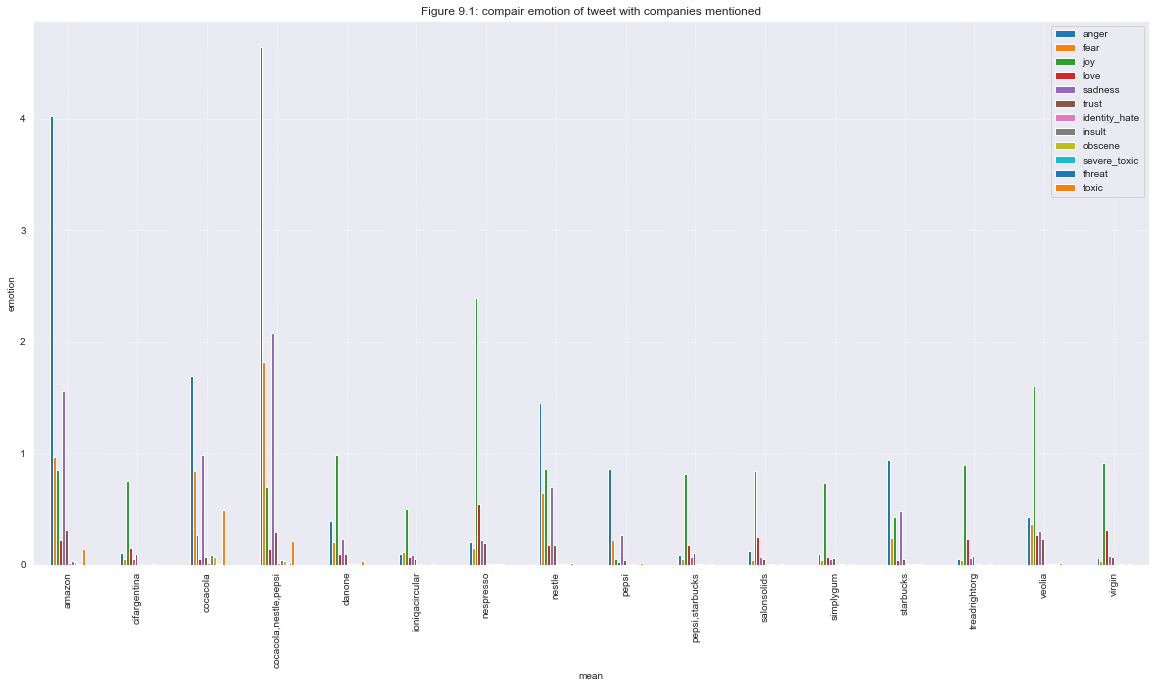

In [66]:
from matplotlib.pyplot import figure
Allcompaniesemoplot=Allcompaniesemo.plot(kind="bar",title="Figure 9.1: compair emotion of tweet with companies mentioned")
plt.grid(linestyle="--", alpha=0.5)
plt.xlabel("mean")
plt.ylabel("emotion")
plt.gcf().set_size_inches(20, 10)
plt.show()

Summary: From the Figure 9.1: we can see that aside of Coca-cola, the highest score of anger also have nestle and Pepsi. Follow by is Amazon, the score is almost 2 time higher then others.  Nesspresso as a coffee company, owned by Nestle unexpectly have the highest score in joy. Starbust also as a coffee company , but the tweet mentioned was mostly contain anger emotion.

In [67]:
cocacolafulldata=ConversationsLean[ConversationsLean['txt'].str.contains('cocacola')]

In [68]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [69]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [70]:
text2 = cocacolafulldata['tweet.full_text_clean'].tolist() 
text2 = ' '.join(text2).lower()

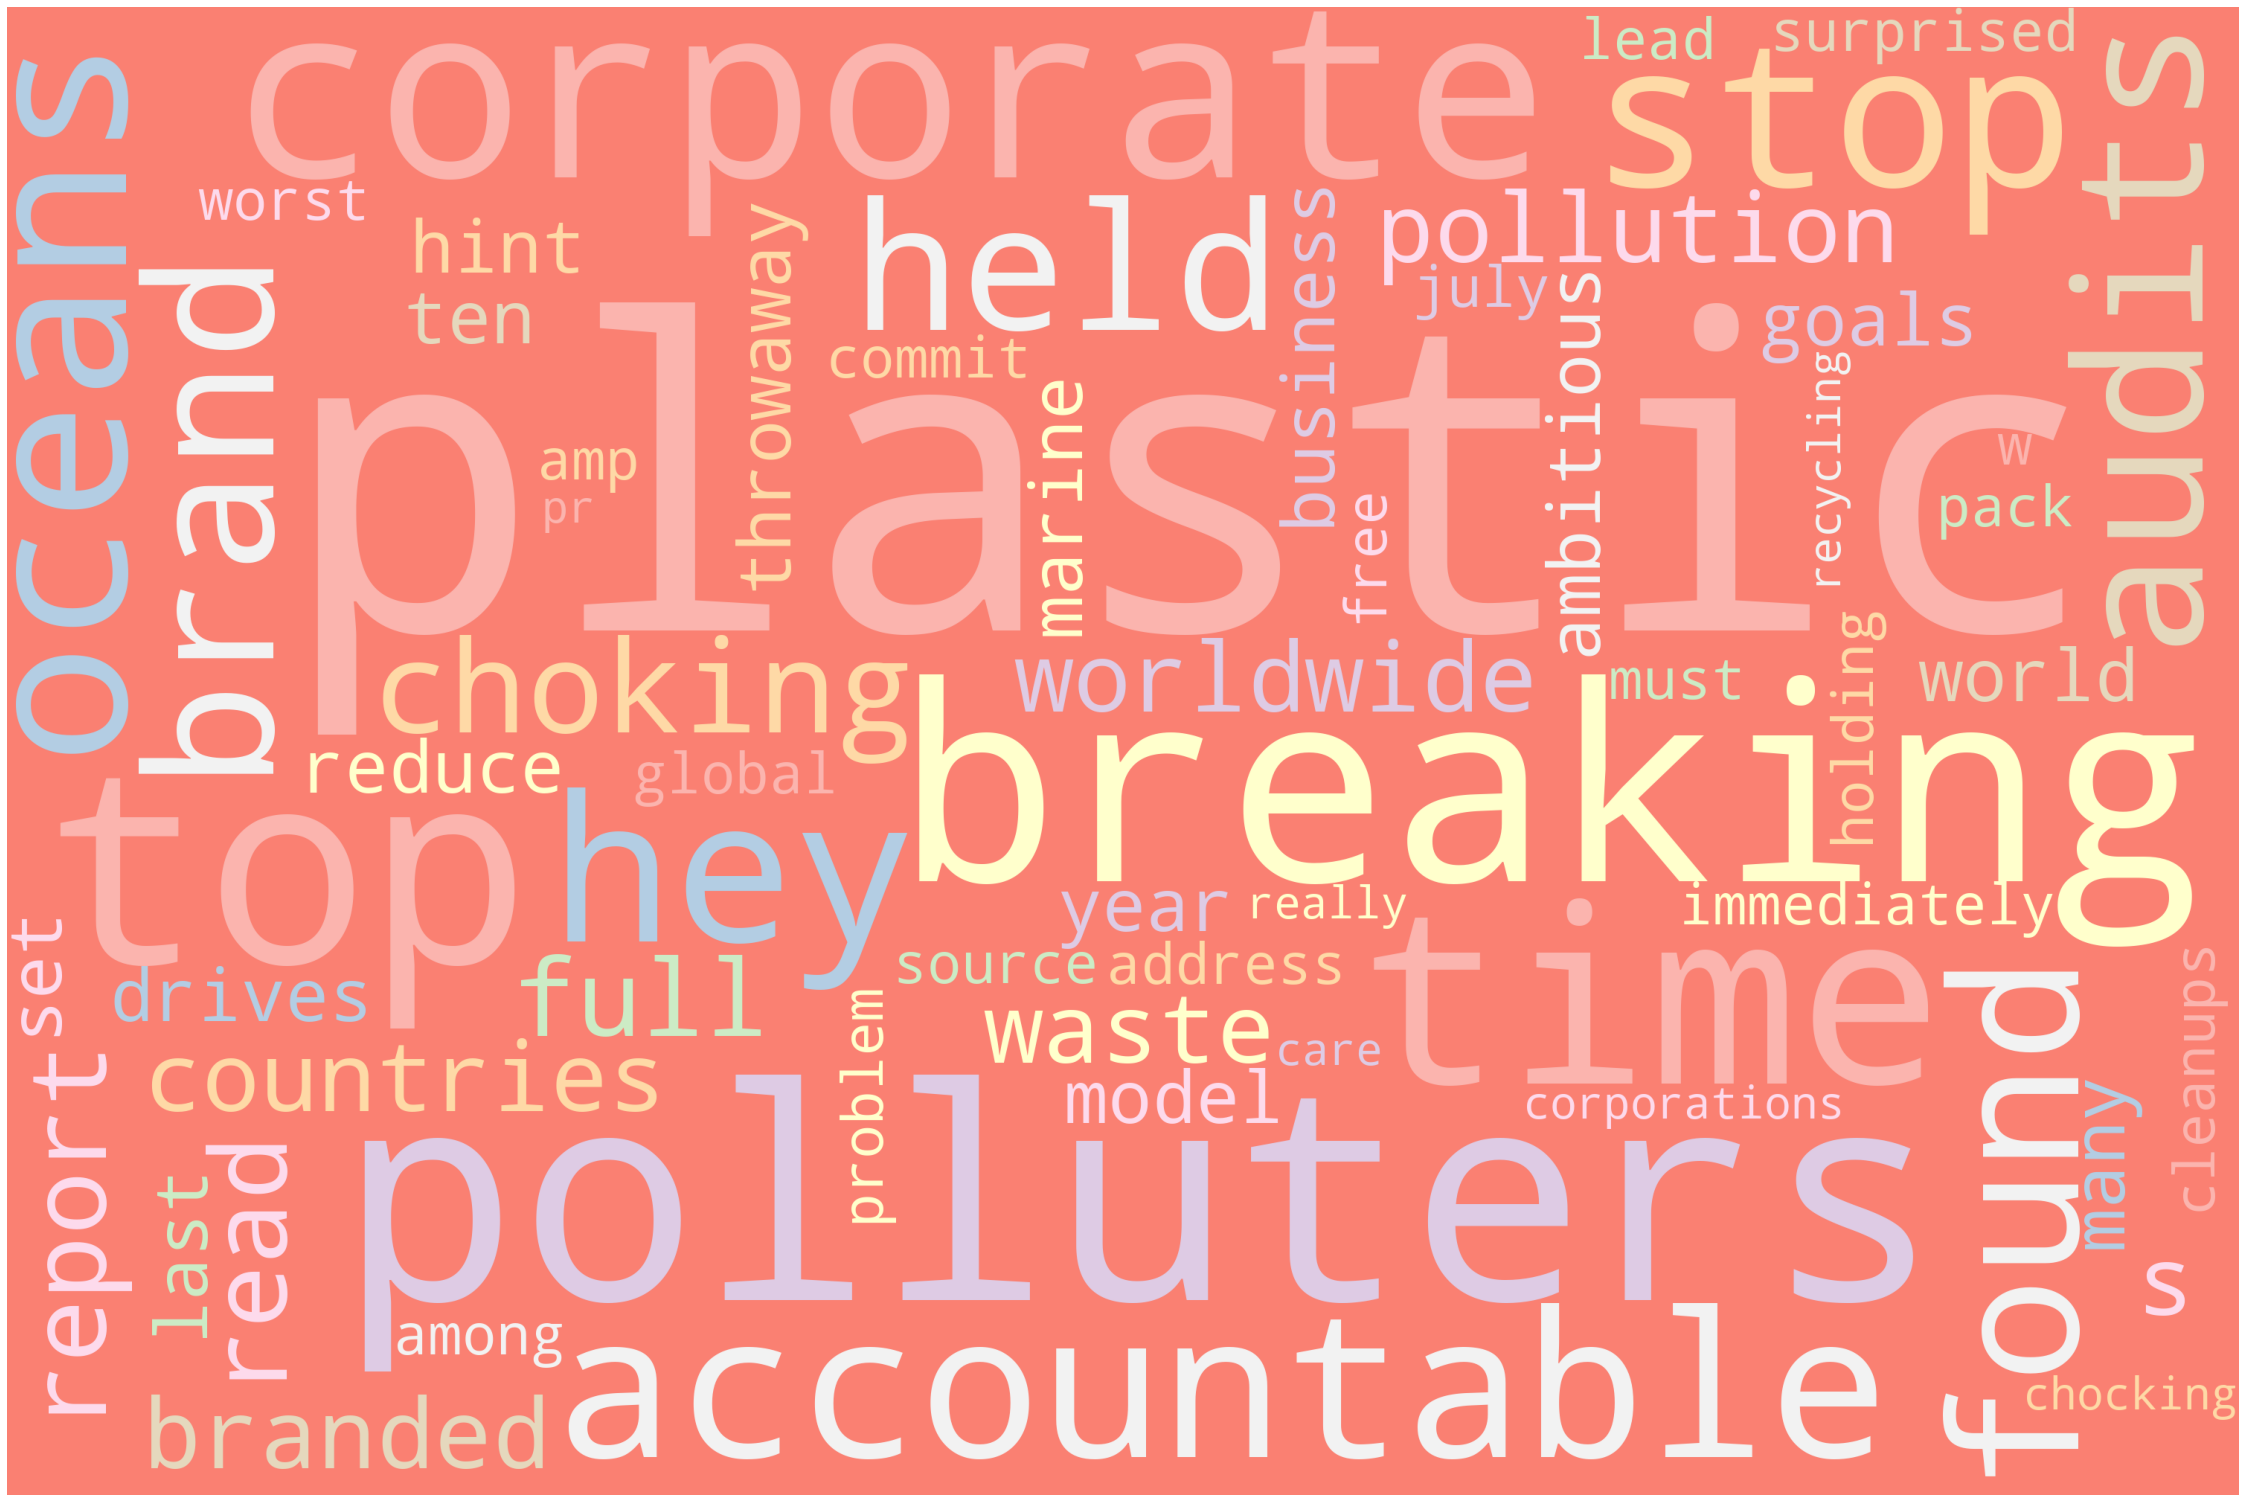

In [71]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text2)
plot_cloud(wordcloud)


summary: From the Wordcloud of tweets related to Coca-cola, we can see that most of them are accuse Coca-cola is a top polluter. Some of them advertise to stop buying the product of Coca-cola or ask them to stop using plastic. Even though we are a B2B business, those negative voices may lead to clients seek alternatives to plastic thereby affecting our business.

Nespresso has a comparatively high score in positive emotions. Mostly because almost all the product are made by aluminium. One thing about this material is that aluminium made containers are packaging that can be fully recycled, and it can even be melted down to be recycled for multiple uses without compromising quality. 

However, plastic bottles, which are reusable and lightweight, are still the most popular packaging for customers, besides, only using aluminium and glass packaging will also increase the carbon footprint. Coke is the most acidic carbonated drink, this acidity is due to the Coke drink formulation. Therefore, even using aluminium cans, additional protective polymer lining need to be added to avoid corrosion, this made the cans can only be recycled by re-melting at a temperature of 600ﹾ, which will cause more greenhouse gas emissions.

Therefore, it is an irreplaceable product for now.  Howbeit, to make our company more competitive, and retain clients, there are some suggestions:

- introduce biodegradable or compostable plastic manufacturing technology. The former can be decomposed and converted by microorganisms; the latter can not only be decomposed by microorganisms but can also be converted into fertilizers together with food and organic waste.  However, the development investment in this technology is relatively high. Also, the cost of production may increase over 10 times.  Product prices will rise, which can lead to customers hold back.

- Partner with a recycling company, focuse on recycling Ocean Plastics. Plastic is considered the leading marine pollution. Ocean-bound plastic recycling not only can reduce marine pollution while having a positive impact on the local community. 

- help Coca-cola setup some school recycling programme. Educating people to change their trash habits is the most effective way to reduce plastic pollution. Therefore, cooperating with School, allow student and teacher to have a recycling mind and bring it to apply it in their home and their communities, which help to create a culture of environmental stewardship.  On another hand, this can also establish a good company image for Coca-cola and ourself.

- Use at least 50% recycled material. To use 100% recycled material still has technically challenged. Besides, to balance the cost and quality, 50% recycled material is a better chose. In the meantime, we can keep trying to increase the use proportion of the recycled material to 70% in our products. Which allow our customer have a more aggressive choice. 

- Apply EcoTwist technology. EcoTwist technology can reduce PET use by 12%. which also makes the making our product easier to compact and takes up less space in the recycling bin after use.